<a href="https://colab.research.google.com/github/PuruBhatnagar1197/Machine-Learning-Revision/blob/main/Isolationforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r"/content/train.csv")

In [ ]:
df.head()

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160


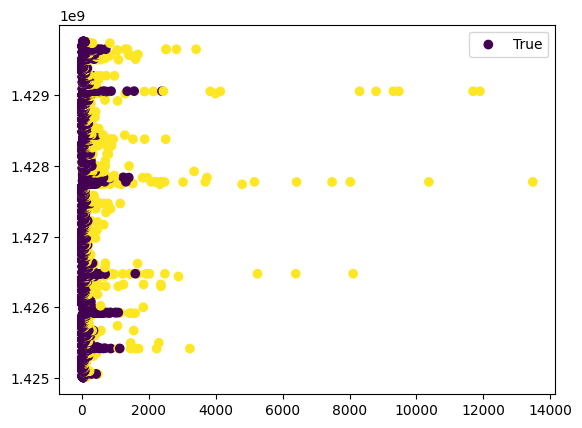

In [ ]:
plt.scatter(df['value'], df['timestamp'], c=df['is_anomaly'], label=True)
plt.legend()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
x_train, x_test,y_train, y_test=train_test_split(df[['timestamp','value','predicted']], df['is_anomaly'],test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import IsolationForest

### normal IsolationForest

In [ ]:
clf=IsolationForest()

In [ ]:
clf.fit(x_train,y_train)

IsolationForest()

In [ ]:
pred=clf.predict(x_test)

In [ ]:
pred

array([ 1, -1,  1, ...,  1,  1, -1])

In [ ]:
pred[pred==1]=1
pred[pred==-1]=0


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.75      0.08      0.15      2997
        True       0.03      0.50      0.06       169

    accuracy                           0.11      3166
   macro avg       0.39      0.29      0.10      3166
weighted avg       0.71      0.11      0.15      3166



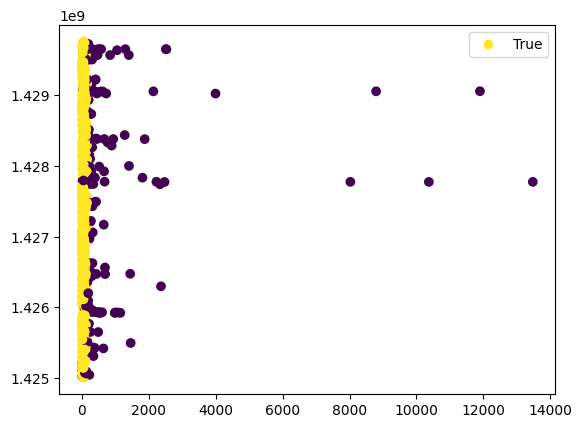

In [ ]:
plt.scatter(x_test['value'], x_test['timestamp'], c=pred, label=True)
plt.legend()

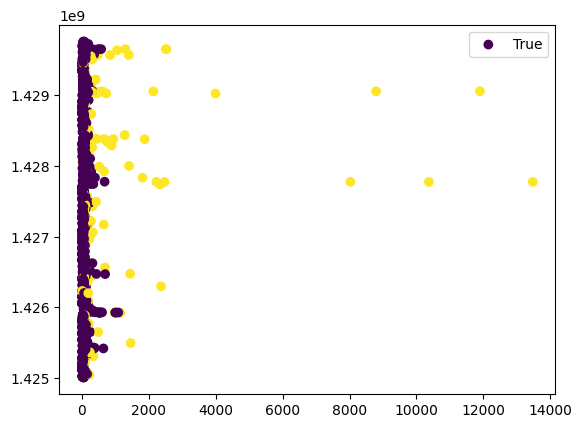

In [ ]:
plt.scatter(x_test['value'], x_test['timestamp'], c=y_test, label=True)
plt.legend()

In [ ]:
pd.Series(y_test).value_counts()

is_anomaly
False    2997
True      169
Name: count, dtype: int64

In [ ]:
pd.Series(pred).value_counts()

1    2831
0     335
Name: count, dtype: int64

In [ ]:
from sklearn.tree import plot_tree

[Text(0.6059229651162791, 0.9444444444444444, 'x[2] <= 144.614\nsquared_error = 0.081\nsamples = 256\nvalue = 0.482'),
 Text(0.3528343023255814, 0.8333333333333334, 'x[2] <= 67.074\nsquared_error = 0.081\nsamples = 236\nvalue = 0.481'),
 Text(0.13372093023255813, 0.7222222222222222, 'x[2] <= -1.045\nsquared_error = 0.081\nsamples = 181\nvalue = 0.472'),
 Text(0.12209302325581395, 0.6111111111111112, 'squared_error = 0.0\nsamples = 1\nvalue = 0.888'),
 Text(0.14534883720930233, 0.6111111111111112, 'x[0] <= 1429504970.494\nsquared_error = 0.081\nsamples = 180\nvalue = 0.469'),
 Text(0.0872093023255814, 0.5, 'x[1] <= 79.165\nsquared_error = 0.079\nsamples = 171\nvalue = 0.484'),
 Text(0.05813953488372093, 0.3888888888888889, 'x[1] <= 77.194\nsquared_error = 0.079\nsamples = 162\nvalue = 0.475'),
 Text(0.046511627906976744, 0.2777777777777778, 'x[0] <= 1427792957.208\nsquared_error = 0.079\nsamples = 161\nvalue = 0.477'),
 Text(0.023255813953488372, 0.16666666666666666, 'x[1] <= 64.001\nsq

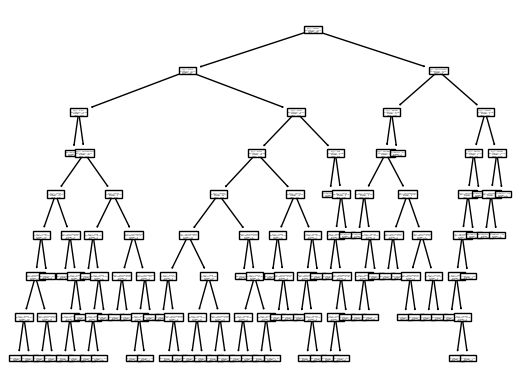

In [ ]:
plot_tree(clf.estimators_[0])

#### more complex isolation tree

In [ ]:
print(df[df['is_anomaly']==1].shape[0]/df.shape[0])
clf=IsolationForest(n_estimators=100, contamination=df[df['is_anomaly']==1].shape[0]/df.shape[0],max_samples=int(df.shape[0]*0.5),random_state=10)

0.04902084649399874


In [ ]:
clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.04902084649399874, max_samples=7915,
                random_state=10)

In [ ]:
pred=clf.predict(x_test)

In [ ]:
pred[pred==1]=1
pred[pred==-1]=0

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.61      0.03      0.06      2997
        True       0.04      0.66      0.07       169

    accuracy                           0.06      3166
   macro avg       0.32      0.34      0.06      3166
weighted avg       0.58      0.06      0.06      3166



### for visualization

In [ ]:
df_new=pd.DataFrame(df['value'].sample(10),columns=['value']).reset_index().drop('index',axis=1)

In [ ]:
df_new

,value
0,24
1,30
2,89
3,38
4,14
5,22
6,89
7,34
8,66
9,66


In [ ]:
clf1=IsolationForest(n_estimators=1,contamination='auto',max_samples=df_new.shape[0],random_state=10)

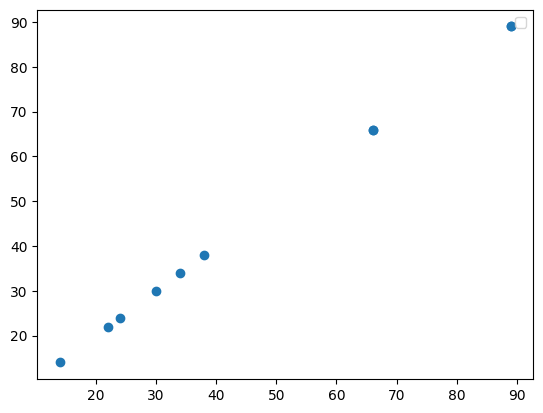

In [ ]:
plt.scatter(df_new['value'], df_new['value'])
plt.legend()

In [ ]:
clf1.fit(df_new)

IsolationForest(max_samples=10, n_estimators=1, random_state=10)

In [ ]:
predictions=clf.predict(df_new)
predictions

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1])

In [ ]:
clf1.decision_function(df_new) ## here you can set threshold to say what is anomaly and what is not something what we have below
# anomaly_scores = iforest.decision_function(X)

# # Step 4: Set Custom Threshold
# custom_threshold = -0.1  # Adjust this threshold as needed

# # Determine anomalies based on the custom threshold
# anomalies = X[anomaly_scores < custom_threshold]

array([ 0.11818456,  0.0226846 , -0.19088017, -0.07425408,  0.11818456,
        0.11818456, -0.19088017, -0.07425408,  0.0226846 ,  0.0226846 ])

In [155]:
clf1.estimators_[0].apply(df_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreeRegressor was fitted without feature names
  warnings.warn(


array([ 4,  5, 10,  8,  4,  4, 10,  6,  9,  9])

[Text(0.6666666666666666, 0.9, 'x[0] <= 81.973\nsquared_error = 0.082\nsamples = 10\nvalue = 0.411'),
 Text(0.5555555555555556, 0.7, 'x[0] <= 37.602\nsquared_error = 0.09\nsamples = 8\nvalue = 0.41'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 32.15\nsquared_error = 0.087\nsamples = 5\nvalue = 0.455'),
 Text(0.2222222222222222, 0.3, 'x[0] <= 25.1\nsquared_error = 0.08\nsamples = 4\nvalue = 0.379'),
 Text(0.1111111111111111, 0.1, 'squared_error = 0.05\nsamples = 3\nvalue = 0.498'),
 Text(0.3333333333333333, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 0.021'),
 Text(0.4444444444444444, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 0.761'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 54.417\nsquared_error = 0.087\nsamples = 3\nvalue = 0.335'),
 Text(0.6666666666666666, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 0.749'),
 Text(0.8888888888888888, 0.3, 'squared_error = 0.002\nsamples = 2\nvalue = 0.129'),
 Text(0.7777777777777778, 0.7, 'squared_error = 0.047\nsamples = 2\nvalue = 0.416'

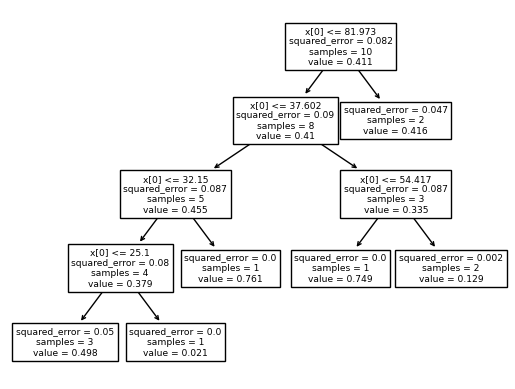

In [152]:
plot_tree(clf1.estimators_[0])